In [1]:
#Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np

In [2]:
#Write code to load the dataset here
df = pd.read_csv("UberRequestData.csv")

In [3]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [5]:
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [6]:
df.Status.value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

In [7]:
df[((df["Driver id"].isnull())) & (df["Status"]== "No Cars Available")].shape

(2650, 6)

In [8]:
df[df["Status"]== "No Cars Available"].shape

(2650, 6)

## Q1. Null Values
Which columns have null values and how many?

a) Request id - 2650 Driver id -3914

b) Request id-   3914 Driver id - 2650

c) Driver id - 2650 Drop time stamp -3914

d) There are no null values in the dataset.

In [9]:
#Write your code here

## Q2. Choose Correct

Select the correct statements from the options given below. (More than one may be correct)

a) We need to delete the records containing the null values as they won’t be useful for our analysis.

b) Only the records containing null values in the Driver id need to be eliminated.

c) There are a total of 1264 requests which have a status of “cancelled”

d) We need to keep the records containing null values for both the columns and using them analyse the problems faced by Uber.

In [10]:
#write your code here

## Q3. Busy Hour

Now that you have understood the significance of the null values in this case study, the next step would involve fixing the Request Time-Stamp and Drop-Time Stamp columns. Go ahead and convert it into a date-time object. After that report back the hour in which the most number of requests are being made.

a) 18:00-19:00

b) 16:00-17:00

c) 14:00-15:00

d) 13:00-14:00

e) 19:00-20:00

In [11]:
#write your solution here
df["Request timestamp"]=pd.to_datetime(df["Request timestamp"])

In [12]:
df["Drop timestamp"]=pd.to_datetime(df["Drop timestamp"])

In [13]:
df["Request timestamp"].dt.hour.value_counts()

18    510
20    492
19    473
21    449
5     445
9     431
8     423
17    418
7     406
6     398
22    304
10    243
4     203
23    194
12    184
11    171
15    171
13    160
16    159
14    136
2      99
0      99
3      92
1      85
Name: Request timestamp, dtype: int64

In [14]:

df['Request Hour']=df['Request timestamp'].apply(lambda x: x.hour)
df[df['Status']=='Cancelled']['Request Hour'].value_counts()

8     178
5     176
9     175
7     169
6     145
10     62
4      51
21     42
20     41
17     35
19     24
18     24
16     22
15     21
12     19
13     18
11     15
22     12
14     11
23     10
2       5
1       4
0       3
3       2
Name: Request Hour, dtype: int64

In [15]:
df["Request Hour"].value_counts()

18    510
20    492
19    473
21    449
5     445
9     431
8     423
17    418
7     406
6     398
22    304
10    243
4     203
23    194
12    184
11    171
15    171
13    160
16    159
14    136
2      99
0      99
3      92
1      85
Name: Request Hour, dtype: int64

## Q4. Cancelled Dates
Next, extract the date from the request timestamp and find the date when the most number of trips were cancelled.

a) 2016-07-13

b) 2016-11-07

c) 2016-07-14

d) 2016-07-15 

e) 2016-12-07

In [16]:
#write your code here
df['Request Date']=df['Request timestamp'].apply(lambda x: x.date())
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Hour,Request Date
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,2016-11-07
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,2016-11-07
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,2016-12-07
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,2016-12-07
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,2016-07-13


## Q5. Correct Statements II

Choose the correct statements from the ones given below.

(More than one may be correct)

a) In general, the five hour time period in which the most number of trips are completed is approximately 5-10.

b) Across all the days, the number of trips from the City that get cancelled is nearly 9 times less than the trips when there were no cars available.

c) Across all the days, the number of trips from the Airport that get cancelled is comparable to the number of trips when there were no cars available.

d) The number of trips getting completed from City is higher than the trips completed from the airport.


In [17]:
# write your code here
df.head()

df=df.drop(["Request hour"],axis=1)

KeyError: "['Request hour'] not found in axis"

In [ ]:
Q5a=df[df['Status']=='Trip Completed']['Request hour'].value_counts().sort_index()


In [ ]:
len(df[(df['Pickup point']=='Airport') & (df['Status']=='Cancelled')])

In [ ]:
len(df[(df['Status']=='No Cars Available')])

## Q6. Request Time

Once you’ve analysed requests for all the days at an aggregate level, it’s time to find patterns in individual days and see if there is anything common across the days. Analyse the distribution of requests across all the days and choose the correct option.

a) The most number of requests are obtained only in the morning hours across all the days.

b) The most number of requests are obtained only in the evening hours across all the days.

c) The most number of requests are obtained both in the morning as well as the evening hours across all the days.

d) None of these

In [ ]:
##Write your code here
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


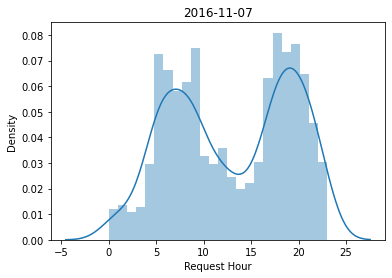

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


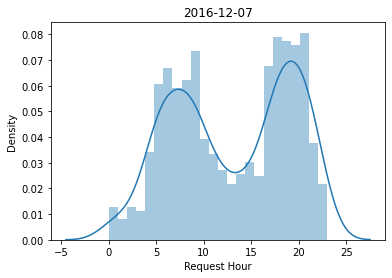

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


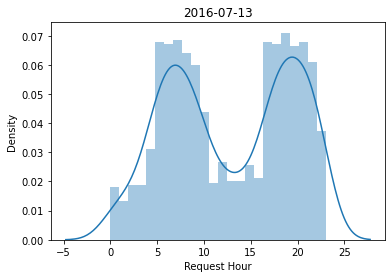

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


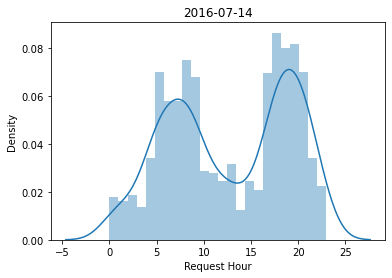

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


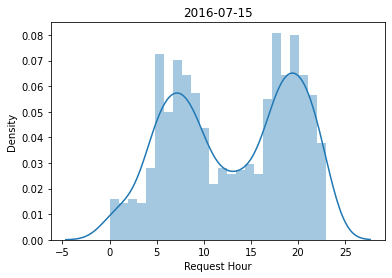

In [22]:
#best way to do this is to plot the histograms for all dates
#we first get the unique dates 
unique_dates=df['Request Date'].unique()
#and now use a for loop to plot the histogram on 'Request hour'
for i in unique_dates:
    #we will use 24 bins, one bin for each hour
    sns.distplot(df[df["Request Date"]==i]['Request Hour'], bins=24)
    plt.title(str(i))
    plt.show()

In [ ]:
sns.scatterplot

## Q7. Request Time II

Now that you’ve observed that the number of requests across all the days is similar, you need to check it across the pick-up points as well. Analyse the distribution of requests across each of the pick-up points exclusively and choose the correct option:

a) The majority of requests from City are obtained during evening hours.

b) The majority of requests from Airport are obtained during morning hours.

c) The majority of requests from City are obtained during morning hours.

d) Both a) and b)


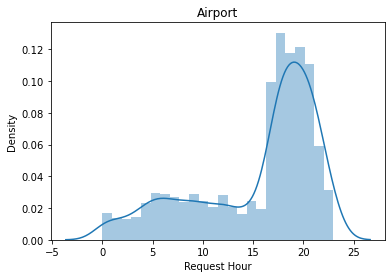

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


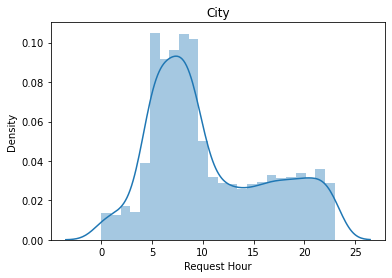

In [25]:
# Write your code here
unique_dates=["Airport","City"]
#and now use a for loop to plot the histogram on 'Request hour'
for i in unique_dates:
    #we will use 24 bins, one bin for each hour
    sns.distplot(df[df["Pickup point"]==i]['Request Hour'], bins=24)
    plt.title(str(i))
    plt.show()

## Q8. Request Time III
Now that you have realised the patterns of requests coming from both the city and the airport, the next step is to divide the entire time period to certain slots and then analyse them using plots. Use the following classification table to create the slots and then choose the correct option.


| Hour Range(x) |   Time Slot   |
|:-------------:|:-------------:|
|     x < 5     | Early morning |
|  5 <= x < 10  |    Morning    |
|  10 <= x < 17 |    Day Time   |
|  17 <= x < 22 |    Evening    |
|    22 <= x    |   Late Night  |


a) The maximum number of requests across all the days happens in the Evening.

b) The minimum number of requests across all the days happens in Early Morning.

c) The minimum number of requests across all the days happens in Late Night.

d) Both a) and c)

In [31]:
def time_period(x):
    #divide the time of the day into five categories
    if x < 5:
        return "Early Morning"
    elif 5 <= x < 10:
        return "Morning"
    elif 10 <= x < 17:
        return "Day Time"
    elif 17 <= x < 22:
        return "Evenning"
    else:
        return "Late Night"

#use this function on the request hour to create Time slot 
df['Time slot'] = df['Request Hour'].apply(lambda x: time_period(x))
#and now simply use value_counts()
df['Time slot'].value_counts()

Evenning         2342
Morning          2103
Day Time         1224
Early Morning     578
Late Night        498
Name: Time slot, dtype: int64

## Q9. Bar
After this, you decide to plot a bar plot with the time slots in the X-axis and the number of requests in the Y-axis and observe the Status of trips for each time slot. This way you’ll get the number of trip request across each time slot and their status as well. 

To make things easier, you created an additional column called ‘Count’ whose value is fixed at 1 for all the rows(df["Count"]=1). Then in order to create a bar plot as mentioned in the first statement, you decided to use sns.barplot() function. 

What are the parameters that you need to take here?

a) Take time slots as x and Count as y

b) Take the Status as hue and df as the data

c) Both (a) and (b)

d) The parameters mentioned above are insufficient

In [32]:
#Use this for rough work
df["count"]=1

In [33]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Hour,Request Date,Time slot,count
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,2016-11-07,Day Time,1
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,2016-11-07,Evenning,1
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,2016-12-07,Morning,1
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,2016-12-07,Evenning,1
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,2016-07-13,Morning,1


In [40]:
requests=pd.pivot_table(data=df,columns="Time slot", index="Status",values="count" ,aggfunc= sum)
requests

Time slot,Day Time,Early Morning,Evenning,Late Night,Morning
Status,,,,,
Cancelled,168,65,166,22,843
No Cars Available,334,299,1392,219,406
Trip Completed,722,214,784,257,854


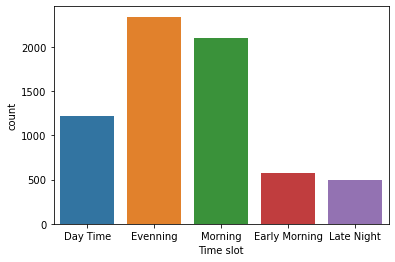

In [44]:
sns.barplot(x=df["Time slot"],y= df["count"] ,estimator = np.sum)
plt.show()

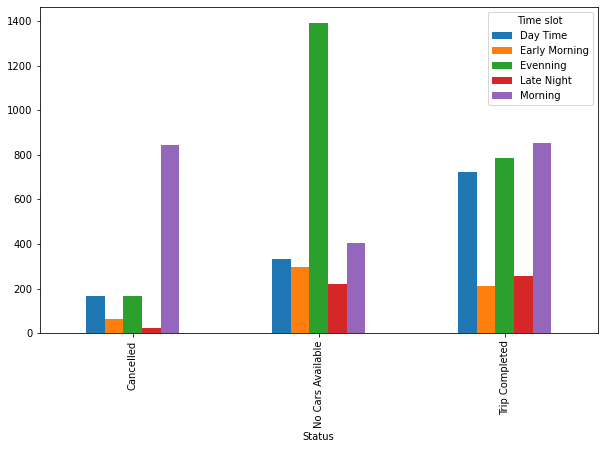

In [45]:
requests.plot(kind="bar",stacked = False ,figsize=[10,6])
plt.show()

## Q10. Correct Bar
Once you have created the bar plot correctly, what major issues are you able to observe? Choose the correct options amongst the following-

a) A majority of requests in the evening are having a “No cars available” status

b) The major issue in the morning slot is that it has a lot of cancellations

c) Both (a) and (b)

d) None of the above

In [ ]:
#use this as rough work

<AxesSubplot:xlabel='Time slot', ylabel='count'>

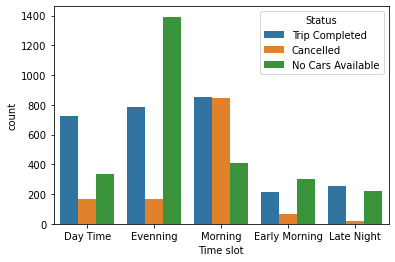

In [47]:
sns.barplot(data = df, x = 'Time slot', y='count', hue= 'Status',estimator = np.sum)

## Q11. Demand Supply
Now that you’ve understood the major issues in the morning and the evening time slots, it’s time to compute the demand and supply gap. Here,

Demand - Number of Requests Uber Gets
Supply - Number of Requests Uber is able to fulfil

Demand supply gap = Demand - Supply.

Compute the demand-supply gap for both the morning and the evening slots for the Pick-up points having the most number of requests in that time_slot


a) Morning - 1205 Evening - 1427

b) Morning - 1427 Evening - 1205

c) Morning - 1249 Evening - 1558

d) Morning - 1558 Evening - 1249


In [73]:
#write your code here
demandsupply_City=pd.pivot_table(df[df['Pickup point']=='City'], values='count', index='Time slot', columns ='Status', aggfunc=np.sum)
demandsupply_Airport=pd.pivot_table(df[df['Pickup point']=='Airport'], values='count', index='Time slot', columns ='Status', aggfunc=np.sum)

In [80]:
demandsupply_City=pd.pivot_table(df[df['Pickup point']=='City'], values='count', index='Time slot', columns ='Status', aggfunc=np.sum)
demandsupply_Airport=pd.pivot_table(df[df['Pickup point']=='Airport'], values='count', index='Time slot', columns ='Status', aggfunc=np.sum)

demandsupply_City["gap"]=(demandsupply_City["Trip Completed"]- (demandsupply_City["Cancelled"] + demandsupply_City["No Cars Available"]))


In [81]:
demandsupply_City

Status,Cancelled,No Cars Available,Trip Completed,gap
Time slot,,,,
Day Time,104,247,395,44
Early Morning,63,151,111,-103
Evenning,60,71,411,280
Late Night,19,83,115,13
Morning,820,385,472,-733


In [83]:
demandsupply_Airport=pd.pivot_table(df[df['Pickup point']=='Airport'], values='count', index='Time slot', columns ='Status', aggfunc=np.sum)
demandsupply_Airport["gap"]=(demandsupply_Airport["Trip Completed"]- (demandsupply_Airport["Cancelled"] + demandsupply_Airport["No Cars Available"]))


In [84]:
demandsupply_Airport

Status,Cancelled,No Cars Available,Trip Completed,gap
Time slot,,,,
Day Time,64,87,327,176
Early Morning,2,148,103,-47
Evenning,106,1321,373,-1054
Late Night,3,136,142,3
Morning,23,21,382,338


In [70]:
gap=demand-fulfil
gap

Time slot
Day Time          502
Early Morning     364
Evenning         1558
Late Night        241
Morning          1249
dtype: int64